# <a href="https://miptstats.github.io/courses/ad_fivt.html">Введение в анализ данных</a>
## Домашнее задание 1. Простой анализ данных.

**Правила, <font color="red">прочитайте внимательно</font>:**


* Дедлайн см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины. Правила переноса дедлайнов определены в презентации с первого занятия.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания будут сдавать устный зачет.**
* Задачи 1 и 2 сдаются в систему Яндекс.Контест. Ссылка на контест в телеграм-боте.


**Сдача задачи 3:**

* Выполненную работу нужно отправить телеграм-боту `@miptstats_ds24_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. Дождитесь подтверждения от бота, что он принял файл. Если подтверждения нет, то что-то не так. **Работы, присланные иным способом, не принимаются.**
* Прислать нужно **ноутбук в формате `ipynb`**.
* Телеграм не разрешает боту получать файлы более **20 Мб**. Если ваше решение весит больше, *заранее* разделите ноутбук на несколько.
* Для выполнения задания **используйте этот ноутбук в качестве основы, ничего не удаляя из него**. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*
* **Код из рассказанных на занятиях ноутбуков** можно использовать без ограничений.

**Перед выполнением задания посмотрите презентацию по выполнению и оформлению домашних заданий с занятия 1.**

---

**Баллы за задание:**

<b><font color="blue">Легкая часть</font></b> (достаточно на "хор"):
* Задача 1 &mdash; 10 баллов
* Задача 2 &mdash; 10 баллов
* Задача 3 &mdash; 80 баллов


Баллы учитываются в <b>обязательной части</b> курса и не влияют на оценку по факультативной части.

In [16]:
# Bot check

# HW_ID: fpmi_ad1
# Бот проверит этот ID и предупредит, если случайно сдать что-то не то

# Status: final
# Перед отправкой в финальном решении удали "not" в строчке выше
# Так бот проверит, что ты отправляешь финальную версию, а не промежуточную

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid", font_scale=1.3, palette="Set2")

ModuleNotFoundError: No module named 'numpy'

### <font color="blue"><i>Легкая часть</i></font>

### Задача 1.

Условие задачи и сдача в системе Яндекс.Контест. Ссылка на контест в телеграм-боте.

---
### Задача 2.

Условие задачи и сдача в системе Яндекс.Контест. Ссылка на контест в телеграм-боте.

---
### Задача 3.

Титаник был крупнейшим пассажирским судном в 1912—1913 годах. Во время первого рейса затонул в северной Атлантике, столкнувшись с айсбергом в ночь с 14 на 15 апреля 1912 года, при этом погибло 1502 из 2224 пассажиров и членов экипажа. Данные о пассажирах были собраны в таблицы, которые можно скачать с <a href="https://www.kaggle.com/c/titanic/data" target="_blank">Kaggle</a>. Эти данные часто используются в качестве обучающих в анализе данных.

На дополнительном занятии 10 февраля будет показан простой пример работы с датасетом Титаник. Сейчас ваша задача &mdash; на основе простого анализа предоставленных данных обучить несколько классификаторов для определения выживших, иначе говоря, получить некоторые приближенные правила определения, выжил пассажир или нет, а также сравнить эти правила по качеству приближения.

#### 1. Подготовка данных

Загрузите данные с помощью `pandas`.

In [ ]:
data = pd.read_csv("/content/train.csv", index_col=0)  # загружаем данные

Разделите данные по строкам на две части случайным образом в соотношении 7:3. Первую часть мы будем называть *обучающей*, а вторую &mdash; *тестовой*.

In [ ]:
random_sec = np.random.permutation(
    range(1, len(data) + 1)
)  # создаем случайную последовательность

random_data = data.loc[random_sec]  # с помощью random_sec получаем случайную таблицу

train_data = random_data[
    : round(0.7 * len(data))
]  # соответственно делим в нужных пропорциях
test_data = random_data[round(0.7 * len(data)) - 2 :]

Из каждой части оставим несколько признаков, с которыми мы будем работать, а также отдельно &mdash; целевой признак. Примените к обеим частям таблицы функцию ниже

In [ ]:
features_columns = ["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare"]  # Признаки
target_column = "Survived"  # Целевой признак


def get_features_and_target(data):
    features = data[features_columns]
    target = data[target_column]
    return features, target

In [ ]:
train_features, train_target = get_features_and_target(
    train_data
)  # делим данные по обучающим данным
test_features, test_target = get_features_and_target(
    test_data
)  # делим данные по тренировочным данным

#### 2. Исследование

**Внимание.** Эта часть задачи должна выполняться *исключительно на обучающих данных*. За использование тестовых данных решение не будет оценено.

Проведите визуальный анализ данных чтобы понять, как различные признаки влияют на целевой. Исследовать можно не целиком обучающие данные, а разделить их на две части по одному из признаков, а далее рассматривать каждую часть отдельно.

*Не забывайте про информативность и эстетичность графиков.*

Добавим графики

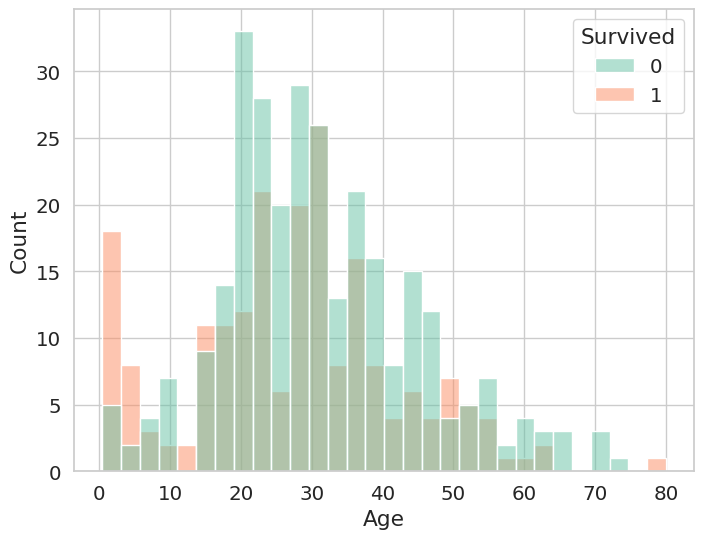

In [ ]:
with sns.axes_style("whitegrid"):  # тут мы наблюдаем влияние возраста на выживаемость
    plt.figure(figsize=(8, 6))
    sns.histplot(data=train_data, x="Age", hue="Survived", bins=30)

Из графика видно что дети "пассажиры не старше 10 лет" выживали часто, в то время как взрослые из возрастного класса "15-25" погибали с большей вероятностью, остальные же - выживали с менее 0.5 вероятностью.

<Axes: xlabel='Sex', ylabel='count'>

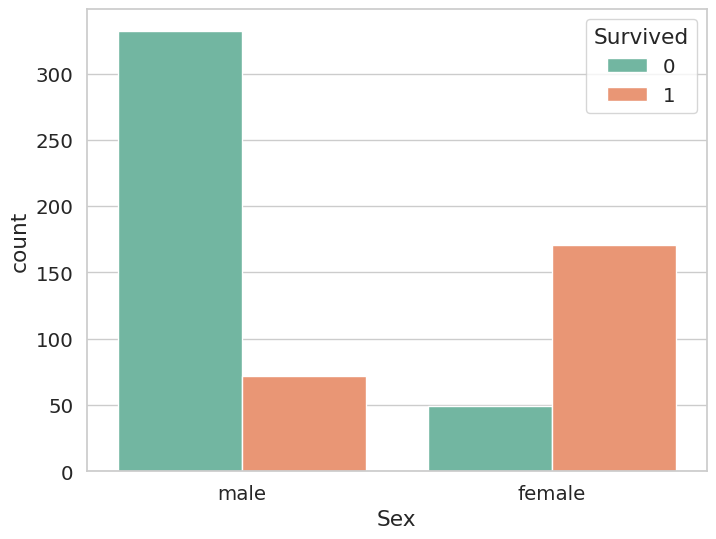

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(data=train_data, x="Sex", hue="Survived")

Тут мы наблюдаем высокую смертность мужчин. Но выживаемость женщин напротив, превышает 0.7 вероятность

(0.0, 150.0)

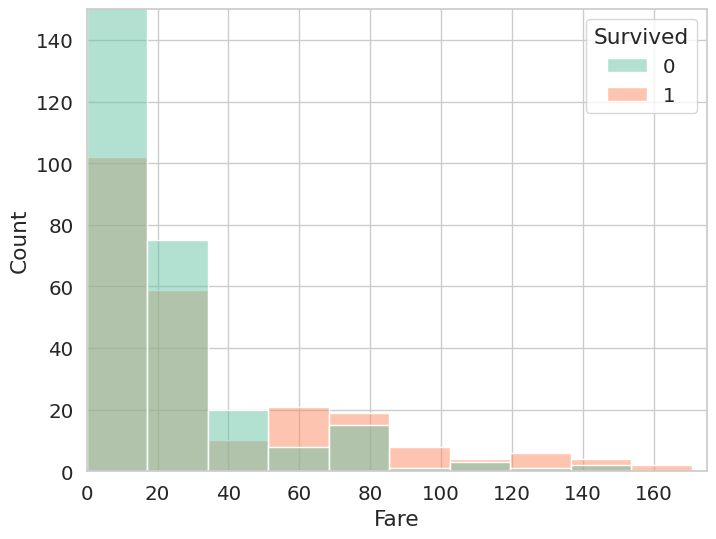

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(data=train_data, x="Fare", hue="Survived", bins=30)
plt.xlim(0, 175)
plt.ylim(0, 150)

Смертность пассажиров с дешевыми билетами очень высокая, но хоть и богатых людей было мало, тем не менее опи показывали положительные результаты намного чаще)

(0.0, 300.0)

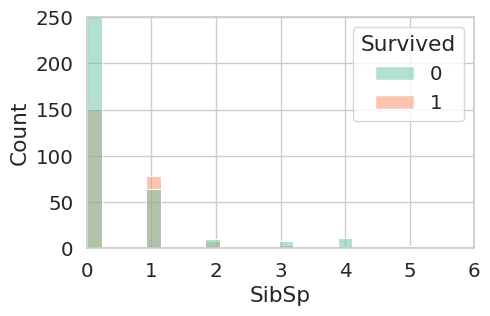

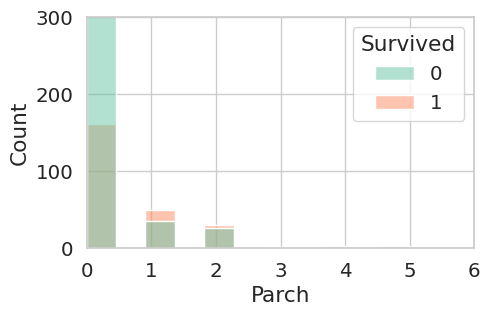

In [ ]:
plt.figure(figsize=(5, 3))
sns.histplot(data=train_data, x="SibSp", hue="Survived")
plt.xlim(0, 6)
plt.ylim(0, 250)

plt.figure(figsize=(5, 3))
sns.histplot(data=train_data, x="Parch", hue="Survived")
plt.xlim(0, 6)
plt.ylim(0, 300)

Здесь в обоих гистограммах наблюдается схожая тенденция, только приблизительно 1/3-ти людей без родственников или без детей и родителей выжило, а остальная часть пассажиров выживали с 0.5 вероятностью

<Axes: xlabel='Pclass', ylabel='Count'>

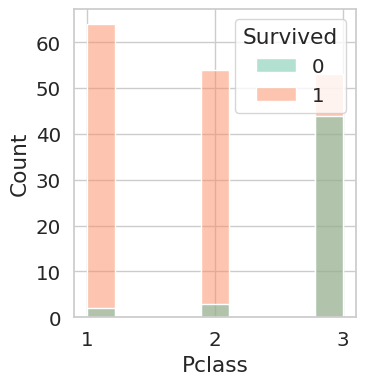

In [ ]:
fem_array = train_data[train_data.Sex == "female"]

plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 2)
sns.histplot(data=fem_array, x="Pclass", hue="Survived")

Женщины в первом и втором классе выживали почти наверное. А вот в третьем классе вероятность выживаемости 0.5





<Axes: xlabel='Age', ylabel='Count'>

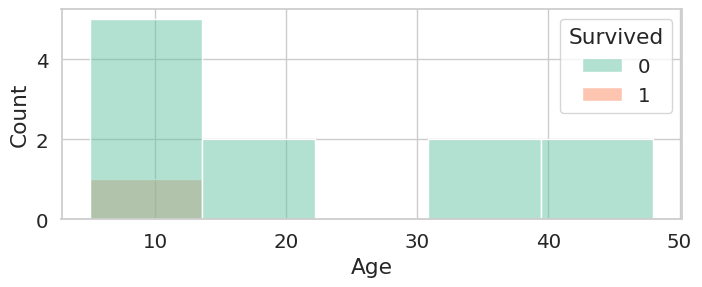

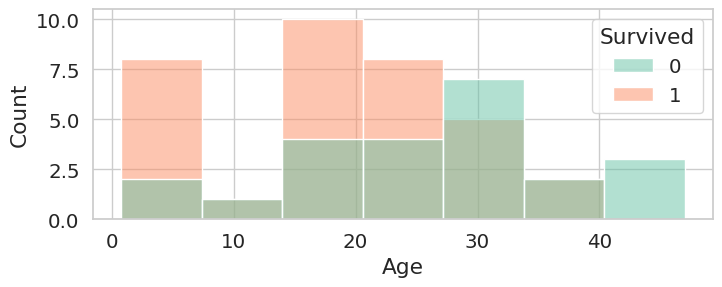

In [ ]:
fem_array = fem_array[fem_array.Pclass == 3]

age_array = fem_array[fem_array.Fare > 25]
plt.figure(figsize=(8, 6))
plt.subplot(2, 1, 1)
sns.histplot(data=age_array, x="Age", hue="Survived")

age_array = fem_array[fem_array.Fare <= 25]
plt.figure(figsize=(8, 6))
plt.subplot(2, 1, 2)
sns.histplot(data=age_array, x="Age", hue="Survived")

Женщины из ІІІ-го класса платившие больше 30 фунтов погибали очень часто, но женщины из другой категории преимущественно выживали

#### 3. Классификация методом ближайшего соседа

Ранее в контесте вы уже реализовали функцию поиска ближайших соседей. Теперь давайте применим ее для решения нашей текущей задачи.

Реализуйте функцию, которая для каждого объекта тестового набора данных найдет $k$ ближайших соседей из обучающего набора данных, и в качестве ответа возьмет наиболее часто встречающееся значение целевого признака среди найденных соседей. Обратите внимание, что соседей необходимо искать только среди объектов обучающего набора данных.

Мы заменяем отссутствующие данные на 0

In [ ]:
from sklearn import preprocessing


def find_nearest_points(A: np.ndarray, B: np.ndarray, k: int) -> np.ndarray:
    A = A.T
    A = A[np.newaxis, :]
    B = B[:, :, np.newaxis]

    C = np.sum((B - A) ** 2, 1)

    C = np.argsort(C, 1)

    return C.T[:k].T


def knn(features, train_features, train_target, k=1):
    """
    Предсказание целевого признака для данных features -- pandas-таблица данных.
    на основе обучающего набора данных train_features, train_target.
    Возвращает pandas.Series с теми же индексами, что и у features.
    Число k -- количество соседей.
    """
    A = train_features.replace(
        {"male": 1, "female": 0}
    )  # заменяем строки "male" и "female" на 1 и 0 соответственно
    B = features.replace({"male": 1, "female": 0})

    A = A.fillna(0)  # зануливаем Nan
    B = B.fillna(0)

    A = A.to_numpy()  # преобразуем таблицы в массивы
    B = B.to_numpy()

    A = preprocessing.normalize(
        A, axis=0
    )  # нормируем данные по столбикам (по признакам)
    B = preprocessing.normalize(B, axis=0)

    C = find_nearest_points(A, B, k)

    predicted = train_target.fillna(0).to_numpy()[C]
    predicted = np.sum(predicted, 1)
    predicted = (predicted >= k / 2).astype(int)

    return pd.Series(predicted)

Постройте классификатор методом ближайшего соседа, используя только признаки `Age` и `Fare`.

Какую метрику (функцию расстояния) вы при этом используете? Нужно ли предварительно что-то сделать с признаками?

In [ ]:
# признаки требуется предварительно отнормировать

mini_feat_column = ["Age", "Fare"]  # подготавливаем данные для функции knn
new_feat_data = data[mini_feat_column]
result = knn(test_features, train_features, train_target)

print(type(result) == type(test_target))

test_data_len = round(0.3 * len(data))
print(round(np.sum(result.to_numpy() == test_target.to_numpy()) / test_data_len, 2))

0.67


Как меняется результат классификации при другом количестве соседей? Рассмотрите хотя бы три различных нечетных значения количества соседей.

In [ ]:
def probability(result):
    print(round(np.sum(result.to_numpy() == test_target.to_numpy()) / test_data_len, 2))


probability(
    knn(test_features, train_features, train_target, 3)
)  # проверка с параметром k = 3
probability(
    knn(test_features, train_features, train_target, 5)
)  # проверка с параметром k = 5
probability(
    knn(test_features, train_features, train_target, 7)
)  # проверка с параметром k = 7

NameError: name 'knn' is not defined

Как можно было бы учесть другие признаки? Какие при этом могут возникнуть проблемы?

...

Строить классификатор с другими признаками при этом не нужно.

#### 4. Классификация логическими правилами

На основе выше проведенного исследования предложите два разных правила в виде решающего дерева, пример которого можете посмотреть в презентации с первой лекции (классификация котиков). Никакие статистические методы использовать не требуется, только логику и графики.

В данной задаче достаточно, если первое дерево будет иметь максимальную глубину 2, а второе &mdash; глубину 1, и при этом не является поддеревом первого. *Примечание*: дерево из одного листа имеет глубину 0.

**Дерево 1:**

             
                (Sex = ?)
              /          \
           female         male
            /              \
      survived           not survived


**Дерево 2:**

                (Sex = ?)
              /          \
           female         male
           /               \
     not survived        (Pclass = ?)
                    /          \
                  {1, 2}        3
                  /              \
              survived         (Fare ? 25)
                               /         \
                              >           <
                             /             \
                      not survived       survived
Реализуйте полученные деревья по шаблону

In [ ]:
def tree1(features):
    predicted = np.zeros(
        len(features)
    )  # создаем массив куда будем записывать результаты
    i = 0
    for j, string in features.iterrows():
        if string["Sex"] == "male":
            predicted[i] = 0
        else:
            predicted[i] = 1
        i += 1
    return pd.Series(predicted)


def tree2(features):
    predicted = np.zeros(
        len(features)
    )  # создаем массив куда будем записывать результаты
    i = 0

    for j, string in features.iterrows():
        if string["Sex"] == "male":
            predicted[i] = 0
        else:
            if string["Pclass"] != 3:
                predicted[i] = 1
            else:
                if string["Fare"] > 25:
                    predicted[i] = 0
                else:
                    predicted[i] = 1
        i += 1
    return pd.Series(predicted)

0      0.0
1      1.0
2      0.0
3      0.0
4      0.0
      ... 
264    0.0
265    0.0
266    1.0
267    0.0
268    0.0
Length: 269, dtype: float64

#### 5. Качество

Вспомним, что у нас имеется тестовая часть выборки. Самое время ее использовать для того, чтобы оценить, насколько хорошими получились деревья. Предложите какой-нибудь критерий качества.

*Замечание*. Не стоит пытаться искать, какие критерии существуют. В данном случае легко предложить адекватный критерий. Стандартные критерии мы разберем позже, но для начала лучше подумать самостоятельно.

**Критерий:**

Оценим точность предположении
Реализуйте данный критерий по шаблону

In [ ]:
def criteria(target, predicted):
    """
    Вычисление критерия качества для предсказания predicted,
    если истинные значения -- target.
    Возвращает одно вещественное число.
    """
    # напомним что test_data_len = round(0.3 * len(data))
    return round(np.sum(target == predicted) / test_data_len, 2)

Оцените качество построенных ранее моделей (два дерева, kNN), используя предложенный критерий.

*Примечание.* Полученные значения не влияют на оценку по задание. Оценивается только корректность и обоснованность решения, а также графики и выводы.

In [ ]:
target = test_target.to_numpy()  # преобразуем табилицу test_target

tree_pred1 = tree1(test_features)  # предположение test_features с помощью tree1
print(criteria(target, tree_pred1))

tree_pred2 = tree2(test_features)  # предположение test_features с помощью tree2
print(criteria(target, tree_pred2))

0.75
0.77


Посчитайте значение предложенного ранее критерия качества для метода ближайшего соседа для значений $k$ от 1 до 10. Постройте график зависимости критерия качества от $k$. Как вы можете пояснить полученные результаты?

[0.67 0.64 0.72 0.7  0.72 0.72 0.73 0.72 0.75 0.73]


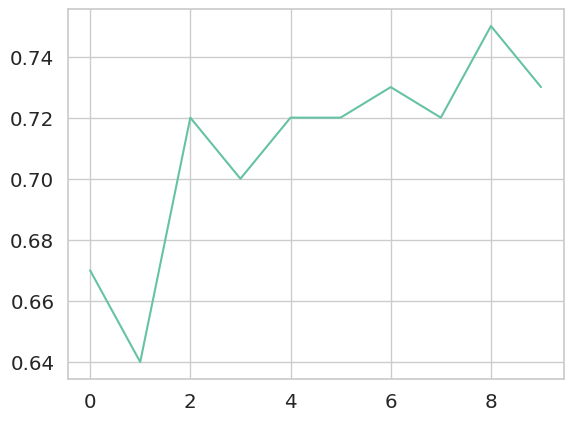

In [ ]:
results_array = np.zeros(10)  # создаем массив для результатов
for i in range(10):  # заполняем массив с результатами
    results_array[i] = criteria(
        target, knn(test_features, train_features, train_target, i + 1)
    )
print(results_array)

plt.plot(results_array)

Как мы можем наблюдать, график постепенно растет что наталкивает на мысль что  чем больше количество соседов рассматривается в классификаторе, тем вы точность самого классификатора. Но в целом вероятности находяться в промежутке [0.6, 0.8]. Рост графика можно оправдать тем что, с большим количеством данных, точность ответов растет соответственно.

#### 6. Выводы

Что мы выяснили по итогу анализа данных?

Классификатор выдает правильные ответы с большей вероятностью с большими k, так как.
Здесь можн онаблюдать некоторые результаты ислледования:
При построении графиков мы выяснили что женщины выжывали намного чаще чем мужчины.

Большая часть детей и пожилых пассажиров спасались намного чаще чем погибали.

Богатые пассажиры имели очень высокие шансы выжить, а также можно было наблюдать тенденцию вероятности выживания по мере спада класса, что опять подтверждает что бедные люди имели меньше шансов выжить чем у осталльных.

так же построенные ранее деревья и классификатор правильно работают с вероятность в диапозоне [0.6 - 0.8]